In [1]:
#  Calculate the "outliers" based on model residuals
#  Analaysis the dataset with the inf activation vs non inf activation (basal SCP =0 and basal SCP >0)

import pandas as pd
col_names = ["LAD_chr",
"LAD_start",
"LAD_end",
"BC_chr",
"BC_start",
"BC_end",
"_barcode",
"cDNA_D0_1_diff",
"cDNA_D0_2_diff",
"cDNA_D0_3_diff",
"cDNA_D0_4_diff",
"cDNA_D2_1_diff",
"cDNA_D2_2_diff",
"cDNA_D2_3_diff",
"cDNA_D2_4_diff",
"cDNA_D5_1_diff",
"cDNA_D5_2_diff",
"cDNA_D5_3_diff",
"cDNA_D5_4_diff",
"cDNA_SCP_A1_ips_vpr",
"cDNA_SCP_A2_ips_vpr",
"cDNA_SCP_B1_ips_vpr",
"cDNA_SCP_B2_ips_vpr",
"cDNA_SCR_A1_ips_vpr",
"cDNA_SCR_A2_ips_vpr",
"cDNA_SCR_B1_ips_vpr",
"cDNA_SCR_B2_ips_vpr",
"cDNA_VPRscp1_ineuron_vpr",
"cDNA_VPRscp2_ineuron_vpr",
"cDNA_VPRscp3_ineuron_vpr",
"cDNA_VPRscp4_ineuron_vpr",
"cDNA_VPRscr1_ineuron_vpr",
"cDNA_VPRscr2_ineuron_vpr",
"cDNA_VPRscr3_ineuron_vpr",
"cDNA_VPRscr4_ineuron_vpr",
"cDNA_WT1_ineuron_vpr",
"cDNA_WT2_ineuron_vpr",
"cDNA_WT3_ineuron_vpr",
"cDNA_WT4_ineuron_vpr",
"cDNA_WT_A_ips_vpr",
"cDNA_WT_B_ips_vpr",
"gDNA_D0_1_diff",
"gDNA_D0_2_diff",
"gDNA_D0_3_diff",
"gDNA_D0_4_diff",
"gDNA_D2_1_diff",
"gDNA_D2_2_diff",
"gDNA_D2_3_diff",
"gDNA_D2_4_diff",
"gDNA_D5_1_diff",
"gDNA_D5_2_diff",
"gDNA_D5_3_diff",
"gDNA_D5_4_diff",
"gDNA_SCP_A1_ips_vpr",
"gDNA_SCP_A2_ips_vpr",
"gDNA_SCP_B1_ips_vpr",
"gDNA_SCP_B2_ips_vpr",
"gDNA_SCR_A1_ips_vpr",
"gDNA_SCR_A2_ips_vpr",
"gDNA_SCR_B1_ips_vpr",
"gDNA_SCR_B2_ips_vpr",
"gDNA_VPRscp1_ineuron_vpr",
"gDNA_VPRscp2_ineuron_vpr",
"gDNA_VPRscp3_ineuron_vpr",
"gDNA_VPRscp4_ineuron_vpr",
"gDNA_VPRscr1_ineuron_vpr",
"gDNA_VPRscr2_ineuron_vpr",
"gDNA_VPRscr3_ineuron_vpr",
"gDNA_VPRscr4_ineuron_vpr",
"gDNA_WT1_ineuron_vpr",
"gDNA_WT2_ineuron_vpr",
"gDNA_WT3_ineuron_vpr",
"gDNA_WT4_ineuron_vpr",
"gDNA_WT_A_ips_vpr",
"gDNA_WT_B_ips_vpr",
"cDNA/gDNA ratio_D0_1_diff",
"cDNA/gDNA ratio.1_D0_2_diff",
"cDNA/gDNA ratio.2_D0_3_diff",
"cDNA/gDNA ratio.3_D0_4_diff",
"cDNA/gDNA ratio.4_D2_1_diff",
"cDNA/gDNA ratio.5_D2_2_diff",
"cDNA/gDNA ratio.6_D2_3_diff",
"cDNA/gDNA ratio.7_D2_4_diff",
"cDNA/gDNA ratio.8_D5_1_diff",
"cDNA/gDNA ratio.9_D5_2_diff",
"cDNA/gDNA ratio.10_D5_3_diff",
"cDNA/gDNA ratio.11_D5_4_diff",
"cDNA/gDNA ratio.12_SCP_A1_ips_vpr",
"cDNA/gDNA ratio.13_SCP_A2_ips_vpr",
"cDNA/gDNA ratio.14_SCP_B1_ips_vpr",
"cDNA/gDNA ratio.15_SCP_B2_ips_vpr",
"cDNA/gDNA ratio.16_SCR_A1_ips_vpr",
"cDNA/gDNA ratio.17_SCR_A2_ips_vpr",
"cDNA/gDNA ratio.18_SCR_B1_ips_vpr",
"cDNA/gDNA ratio.19_SCR_B2_ips_vpr",
"cDNA/gDNA ratio.32_WT_A_ips_vpr",
"cDNA/gDNA ratio.33_WT_B_ips_vpr",
"cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr",
"cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr",
"cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr",
"cDNA/gDNA ratio.23_VPRscp4_ineuron_vpr",
"cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr",
"cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr",
"cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr",
"cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr",
"cDNA/gDNA ratio.28_WT1_ineuron_vpr",
"cDNA/gDNA ratio.29_WT2_ineuron_vpr",
"cDNA/gDNA ratio.30_WT3_ineuron_vpr",
"cDNA/gDNA ratio.31_WT4_ineuron_vpr",
"cutting_MspI high",
"cutting_MspI low",
"cutting_MspI mid",
"cutting_Tat1 37 high",
"cutting_Tat1 37 low",
"cutting_Tat1 37 mid",
"cutting_Tat1 65 high",
"cutting_Tat1 65 low",
"cutting_Tat1 65 mid",
"cutting_ambiguity",
"loc_chr",
"loc_location",
"sum_sum",
"_t test iPSC VPR vs SCR WT",
"_t test iNeuron VPR vs SCR WT",
"_p sig in iPSC",
"_p sig in iNeuron",
"_D5/D0",
"_Segment number",
"_In group index",
"In_or_out",
"Chip_sample",
"Chip_chr",
"Chip_start",
"Chip_end",
"Chip_peak_name",
"Chip_peak_intensity",
"peak_bed",
"Chip_p",
"Chip_q",
"peak_bed",
"Chip_summit"]

Chip_in_TAD = pd.read_csv("/Users/qw2/Documents1/Sanger/GL_analysis/35_chip_with_TAD_boundary/03_bedtools_interesect/02_Chip_expand_LAD.bed",sep="\t", names=col_names, header=None)

/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (119,122,123,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
Chip_in_TAD.head()

,LAD_chr,LAD_start,LAD_end,BC_chr,BC_start,BC_end,_barcode,cDNA_D0_1_diff,cDNA_D0_2_diff,cDNA_D0_3_diff,...,Chip_chr,Chip_start,Chip_end,Chip_peak_name,Chip_peak_intensity,peak_bed,Chip_p,Chip_q,peak_bed.1,Chip_summit
0,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,chr18,32163290,32164466,15_peak_37133,12,.,2.12981,2.63903,1.26677,NaN
1,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,chr18,32162791,32164861,21_peak_36817,16,.,2.27285,3.08611,1.68105,NaN
2,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,chr18,32163494,32165150,28_peak_31089,18,.,2.37092,3.34415,1.85689,NaN
3,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,chr18,32164663,32166214,31_peak_52241,12,.,2.38958,2.80728,1.29286,NaN
4,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,chr18,32184016,32185051,10_peak_41378,12,.,2.30785,2.56412,1.29538,NaN


In [5]:
len(Chip_in_TAD["_barcode"].unique())

2923

In [6]:
import numpy as np
Chip_in_TAD['iPSC_SCP_avg'] = Chip_in_TAD[['cDNA/gDNA ratio.12_SCP_A1_ips_vpr',
                                        'cDNA/gDNA ratio.13_SCP_A2_ips_vpr',
                                        'cDNA/gDNA ratio.14_SCP_B1_ips_vpr',
                                        'cDNA/gDNA ratio.15_SCP_B2_ips_vpr']].median(axis=1)
Chip_in_TAD['iPSC_SCR_avg'] = Chip_in_TAD[['cDNA/gDNA ratio.16_SCR_A1_ips_vpr',
                                        'cDNA/gDNA ratio.17_SCR_A2_ips_vpr',
                                        'cDNA/gDNA ratio.18_SCR_B1_ips_vpr',
                                        'cDNA/gDNA ratio.19_SCR_B2_ips_vpr']].median(axis=1) 

Chip_in_TAD['iNeuron_SCP_avg'] = Chip_in_TAD[['cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr',
                                            'cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr',
                                            'cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr',
                                            'cDNA/gDNA ratio.23_VPRscp4_ineuron_vpr']].median(axis=1) 
Chip_in_TAD['iNeuron_SCR_avg'] = Chip_in_TAD[['cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr',
                                            'cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr',
                                            'cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr',
                                            'cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr']].median(axis=1) 

Chip_in_TAD['median_iPSC_control_gDNA_count'] = Chip_in_TAD[["gDNA_SCP_A1_ips_vpr",
                                                             "gDNA_SCP_A2_ips_vpr",
                                                             "gDNA_SCP_B1_ips_vpr",
                                                             "gDNA_SCP_B2_ips_vpr",
                                                             "gDNA_SCR_A1_ips_vpr",
                                                             "gDNA_SCR_A2_ips_vpr",
                                                             "gDNA_SCR_B1_ips_vpr",
                                                             "gDNA_SCR_B2_ips_vpr",
                                                             "gDNA_WT_A_ips_vpr",
                                                             "gDNA_WT_B_ips_vpr"]].median(axis=1)

Chip_in_TAD['median_iNeuron_control_gDNA_count'] = Chip_in_TAD[["gDNA_VPRscp1_ineuron_vpr",
                                                                "gDNA_VPRscp2_ineuron_vpr",
                                                                "gDNA_VPRscp3_ineuron_vpr",
                                                                "gDNA_VPRscp4_ineuron_vpr",
                                                                "gDNA_VPRscr1_ineuron_vpr",
                                                                "gDNA_VPRscr2_ineuron_vpr",
                                                                "gDNA_VPRscr3_ineuron_vpr",
                                                                "gDNA_VPRscr4_ineuron_vpr",
                                                                "gDNA_WT1_ineuron_vpr",
                                                                "gDNA_WT2_ineuron_vpr",
                                                                "gDNA_WT3_ineuron_vpr",
                                                                "gDNA_WT4_ineuron_vpr",]].median(axis=1)
print("point1")


point1


In [7]:
# filter out the BCs where the median gDNA of dCas9_VPR activation experiment less than 10 read counts
Chip_in_TAD_clean = Chip_in_TAD.loc[(Chip_in_TAD['median_iPSC_control_gDNA_count'] > 10)]

# Drop out iPSC average is 0
Chip_in_TAD_clean_iPSC_1 = Chip_in_TAD_clean.loc[(Chip_in_TAD_clean['iPSC_SCR_avg'] > 0)]


In [8]:
Chip_in_TAD_clean_iPSC_1.head()

,LAD_chr,LAD_start,LAD_end,BC_chr,BC_start,BC_end,_barcode,cDNA_D0_1_diff,cDNA_D0_2_diff,cDNA_D0_3_diff,...,Chip_p,Chip_q,peak_bed.1,Chip_summit,iPSC_SCP_avg,iPSC_SCR_avg,iNeuron_SCP_avg,iNeuron_SCR_avg,median_iPSC_control_gDNA_count,median_iNeuron_control_gDNA_count
0,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,2.12981,2.63903,1.26677,NaN,3.304497,0.467333,3.456505,0.138656,36.5,10.5
1,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,2.27285,3.08611,1.68105,NaN,3.304497,0.467333,3.456505,0.138656,36.5,10.5
2,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,2.37092,3.34415,1.85689,NaN,3.304497,0.467333,3.456505,0.138656,36.5,10.5
3,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,2.38958,2.80728,1.29286,NaN,3.304497,0.467333,3.456505,0.138656,36.5,10.5
4,chr18,32160000,32560000,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,...,2.30785,2.56412,1.29538,NaN,3.304497,0.467333,3.456505,0.138656,36.5,10.5


In [9]:
len(Chip_in_TAD_clean_iPSC_1["_barcode"].unique())

1291

In [10]:
# Calculate the FC permutations
SCP = ['cDNA/gDNA ratio.12_SCP_A1_ips_vpr', 'cDNA/gDNA ratio.13_SCP_A2_ips_vpr', 'cDNA/gDNA ratio.14_SCP_B1_ips_vpr', 'cDNA/gDNA ratio.15_SCP_B2_ips_vpr']
SCR = ['cDNA/gDNA ratio.16_SCR_A1_ips_vpr', 'cDNA/gDNA ratio.17_SCR_A2_ips_vpr', 'cDNA/gDNA ratio.18_SCR_B1_ips_vpr', 'cDNA/gDNA ratio.19_SCR_B2_ips_vpr']

index_i = 0
while index_i < len(SCP):
    index_j = 0
    while index_j < len(SCR):
        print (SCP[index_i], SCR[index_j])
        Chip_in_TAD_clean_iPSC_1['log_activation' + str(index_i) + "_" + str(index_j)] = np.log10(Chip_in_TAD_clean_iPSC_1[SCP[index_i]] / Chip_in_TAD_clean_iPSC_1[SCR[index_j]])
        index_j += 1
    index_i += 1
    
# Calculate the median of FC activation
Chip_in_TAD_clean_iPSC_1['activation_avg'] = Chip_in_TAD_clean_iPSC_1[['log_activation0_0',
                                                                       'log_activation0_1',
                                                                       'log_activation0_2',
                                                                       'log_activation0_3',
                                                                       'log_activation1_0',
                                                                       'log_activation1_1',
                                                                       'log_activation1_2',
                                                                       'log_activation1_3',
                                                                       'log_activation2_0',
                                                                       'log_activation2_1',
                                                                       'log_activation2_2',
                                                                       'log_activation2_3',
                                                                       'log_activation3_0',
                                                                       'log_activation3_1',
                                                                       'log_activation3_2',
                                                                       'log_activation3_3']].median(axis=1)
# Drop all the duplicate rows
Chip_in_TAD_clean_iPSC_1_nodup = Chip_in_TAD_clean_iPSC_1.drop_duplicates(subset=['_barcode', 'BC_start'],keep='first').reset_index()

# Drop all the inf and NA rows based on the activation_avg column
Chip_in_TAD_clean_iPSC_1_nodup.replace([np.inf, -np.inf], np.nan, inplace=True)
Chip_in_TAD_clean_iPSC_1_nodup = Chip_in_TAD_clean_iPSC_1_nodup[pd.notnull(Chip_in_TAD_clean_iPSC_1_nodup['activation_avg'])]

Chip_in_TAD_clean_iPSC_1_nodup['log_iPSC_SCR_avg'] = np.log10(Chip_in_TAD_clean_iPSC_1_nodup["iPSC_SCR_avg"])
Chip_in_TAD_clean_iPSC_1_nodup.replace([np.inf, -np.inf], np.nan, inplace=True)
Chip_in_TAD_clean_iPSC_1_nodup = Chip_in_TAD_clean_iPSC_1_nodup[pd.notnull(Chip_in_TAD_clean_iPSC_1_nodup['log_iPSC_SCR_avg'])]

import matplotlib.pyplot as plt

# first, define a exponential decay function,
from scipy.optimize import curve_fit
def expd(x, a, b):
    return a * np.exp(b * x)

popt, pcov = curve_fit(expd, Chip_in_TAD_clean_iPSC_1_nodup.log_iPSC_SCR_avg.values,
                             Chip_in_TAD_clean_iPSC_1_nodup.activation_avg.values)

# popt contains a and b
print(popt)

('cDNA/gDNA ratio.12_SCP_A1_ips_vpr', 'cDNA/gDNA ratio.16_SCR_A1_ips_vpr')


/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


('cDNA/gDNA ratio.12_SCP_A1_ips_vpr', 'cDNA/gDNA ratio.17_SCR_A2_ips_vpr')
('cDNA/gDNA ratio.12_SCP_A1_ips_vpr', 'cDNA/gDNA ratio.18_SCR_B1_ips_vpr')
('cDNA/gDNA ratio.12_SCP_A1_ips_vpr', 'cDNA/gDNA ratio.19_SCR_B2_ips_vpr')
('cDNA/gDNA ratio.13_SCP_A2_ips_vpr', 'cDNA/gDNA ratio.16_SCR_A1_ips_vpr')
('cDNA/gDNA ratio.13_SCP_A2_ips_vpr', 'cDNA/gDNA ratio.17_SCR_A2_ips_vpr')
('cDNA/gDNA ratio.13_SCP_A2_ips_vpr', 'cDNA/gDNA ratio.18_SCR_B1_ips_vpr')
('cDNA/gDNA ratio.13_SCP_A2_ips_vpr', 'cDNA/gDNA ratio.19_SCR_B2_ips_vpr')
('cDNA/gDNA ratio.14_SCP_B1_ips_vpr', 'cDNA/gDNA ratio.16_SCR_A1_ips_vpr')
('cDNA/gDNA ratio.14_SCP_B1_ips_vpr', 'cDNA/gDNA ratio.17_SCR_A2_ips_vpr')
('cDNA/gDNA ratio.14_SCP_B1_ips_vpr', 'cDNA/gDNA ratio.18_SCR_B1_ips_vpr')
('cDNA/gDNA ratio.14_SCP_B1_ips_vpr', 'cDNA/gDNA ratio.19_SCR_B2_ips_vpr')
('cDNA/gDNA ratio.15_SCP_B2_ips_vpr', 'cDNA/gDNA ratio.16_SCR_A1_ips_vpr')
('cDNA/gDNA ratio.15_SCP_B2_ips_vpr', 'cDNA/gDNA ratio.17_SCR_A2_ips_vpr')
('cDNA/gDNA ratio.15_SCP_

/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[ 0.15722297 -1.1484685 ]


In [12]:
# from all the data, customize bin the data into 100 intervals by the x axis
# rank the y wihtin the bin
# extract the give the absolute rank to the each tem, give them label as 1 to len(tem)
# look for features

Chip_in_TAD_clean_iPSC_1_nodup['CM_bins'] = pd.qcut(Chip_in_TAD_clean_iPSC_1_nodup['log_iPSC_SCR_avg'],200,labels=range(1, 201))
Chip_in_TAD_clean_iPSC_1_nodup.sort_values(by='CM_bins', inplace=True)
Chip_in_TAD_clean_iPSC_1_nodup.head()

Chip_in_TAD_clean_iPSC_1_nodup_with_CM = pd.DataFrame()
for i in range(1, 201):
    tem = Chip_in_TAD_clean_iPSC_1_nodup.loc[Chip_in_TAD_clean_iPSC_1_nodup['CM_bins'] == i]
    tem['rank'] = tem['activation_avg'].rank(method='first')
    Chip_in_TAD_clean_iPSC_1_nodup_with_CM = pd.concat([Chip_in_TAD_clean_iPSC_1_nodup_with_CM,tem])

# sort X values for easy plotting later
Chip_in_TAD_clean_iPSC_1_nodup_with_CM.sort_values(by='log_iPSC_SCR_avg', inplace=True)

/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [30]:
Chip_in_TAD_clean_iPSC_1_nodup.shape

(1151, 167)

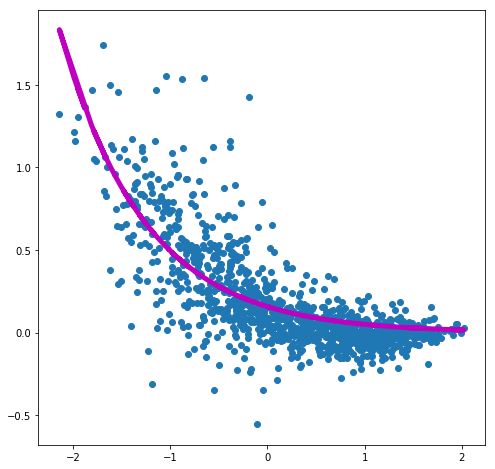

In [13]:
plt.subplots(figsize=(8,8))

# check the scatter
plt.scatter(Chip_in_TAD_clean_iPSC_1_nodup.log_iPSC_SCR_avg.values,
            Chip_in_TAD_clean_iPSC_1_nodup.activation_avg.values)
expect = expd(Chip_in_TAD_clean_iPSC_1_nodup.log_iPSC_SCR_avg.values, popt[0], popt[1])

# plot the fitted line
plt.plot(Chip_in_TAD_clean_iPSC_1_nodup.log_iPSC_SCR_avg.values, expect, 'm-', lw=5)
plt.savefig('/Users/qw2/Desktop/iPSC_expoential_decay.pdf')
plt.show()


/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


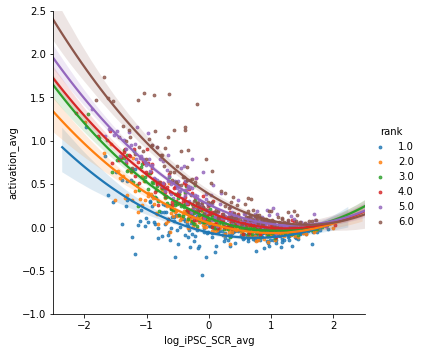

In [14]:
# plot the customized CM groups in the figure
# Note! the way for the outliers is independt of exponetial decay model. It's the up / low of binned ranking
# iPSC!
import seaborn as sns
a = sns.lmplot(x='log_iPSC_SCR_avg',y='activation_avg',hue='rank',
            fit_reg=True, order=2,x_ci=None, scatter_kws={"s": 8},
           data=Chip_in_TAD_clean_iPSC_1_nodup_with_CM)
a.set(xlim=(-2.5,2.5), ylim=(-1,2.5))
plt.show()


In [15]:
Chip_in_TAD_clean_iPSC_1_nodup_with_CM.shape

(1151, 168)

In [16]:
import numpy as np

# calculate the fitted values based on X:
Chip_in_TAD_clean_iPSC_1_nodup_with_CM['fitted_values'] = expd(Chip_in_TAD_clean_iPSC_1_nodup_with_CM.log_iPSC_SCR_avg, *popt)

# calculate the residuals
Chip_in_TAD_clean_iPSC_1_nodup_with_CM['residuals'] = Chip_in_TAD_clean_iPSC_1_nodup_with_CM.activation_avg - Chip_in_TAD_clean_iPSC_1_nodup_with_CM.fitted_values

# calculate the mean and standard deviation of residuls
sd = Chip_in_TAD_clean_iPSC_1_nodup_with_CM.residuals.std()
mean = Chip_in_TAD_clean_iPSC_1_nodup_with_CM.residuals.mean()

# Calculate R2 and plot the expontential decay model
ss_res = np.sum(Chip_in_TAD_clean_iPSC_1_nodup_with_CM['residuals']**2)
ss_tot = np.sum((Chip_in_TAD_clean_iPSC_1_nodup['activation_avg']-np.mean(Chip_in_TAD_clean_iPSC_1_nodup['activation_avg']))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

# get Z scores
Chip_in_TAD_clean_iPSC_1_nodup_with_CM['Z_score'] = (Chip_in_TAD_clean_iPSC_1_nodup_with_CM.residuals - mean) / sd


0.5979339778105635


In [23]:
# fit with other model
# linear
from scipy import stats
res = stats.linregress(Chip_in_TAD_clean_iPSC_1_nodup.log_iPSC_SCR_avg.values, Chip_in_TAD_clean_iPSC_1_nodup.activation_avg.values)
print("R-squared",res.rvalue**2)

('R-squared', 0.5312433794810245)


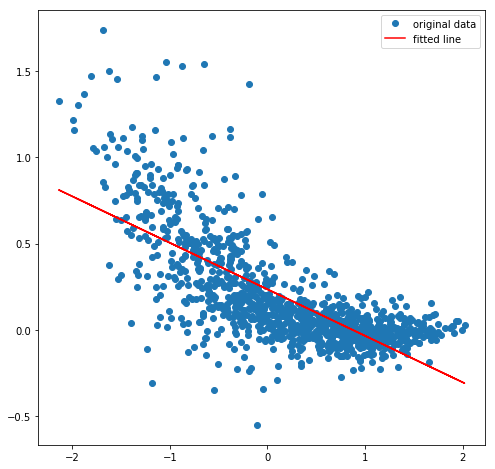

In [27]:
plt.subplots(figsize=(8,8))
plt.plot(Chip_in_TAD_clean_iPSC_1_nodup.log_iPSC_SCR_avg.values,
         Chip_in_TAD_clean_iPSC_1_nodup.activation_avg.values, 'o', label='original data')
plt.plot(Chip_in_TAD_clean_iPSC_1_nodup.log_iPSC_SCR_avg.values,
         res.intercept + res.slope*Chip_in_TAD_clean_iPSC_1_nodup.log_iPSC_SCR_avg.values, 'r', 
         label='fitted line')
plt.savefig('/Users/qw2/Desktop/iPSC_linear_regression.pdf')
plt.legend()
plt.show()

In [16]:
# Map the ED group and CM groups the to Chip_in_10K dataset
Chip_in_10K = pd.read_csv("/Users/qw2/Documents1/Sanger/GL_analysis/29_endo_diff_chip_analysis/03_all_Chip_expand_corrected.csv",sep=",", header=[0,1])

import numpy as np
Chip_in_10K['peak_bed','peak_coverage'] = Chip_in_10K[('peak_bed', 'Chip_end')] - Chip_in_10K[('peak_bed', 'Chip_start')]
Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'] = "NA"
Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'] = np.where(Chip_in_10K[('Chip_sample', 'Chip_sample')].str.contains("iPSC"),'iPSC', Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'])
Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'] = np.where(Chip_in_10K[('Chip_sample', 'Chip_sample')].str.contains("iNeuron"),'iNeuron', Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'])

col_names_2 = [
"BC_chr",
"BC_start",
"BC_end",
"_barcode",
"cDNA_D0_1_diff",
"cDNA_D0_2_diff",
"cDNA_D0_3_diff",
"cDNA_D0_4_diff",
"cDNA_D2_1_diff",
"cDNA_D2_2_diff",
"cDNA_D2_3_diff",
"cDNA_D2_4_diff",
"cDNA_D5_1_diff",
"cDNA_D5_2_diff",
"cDNA_D5_3_diff",
"cDNA_D5_4_diff",
"cDNA_SCP_A1_ips_vpr",
"cDNA_SCP_A2_ips_vpr",
"cDNA_SCP_B1_ips_vpr",
"cDNA_SCP_B2_ips_vpr",
"cDNA_SCR_A1_ips_vpr",
"cDNA_SCR_A2_ips_vpr",
"cDNA_SCR_B1_ips_vpr",
"cDNA_SCR_B2_ips_vpr",
"cDNA_VPRscp1_ineuron_vpr",
"cDNA_VPRscp2_ineuron_vpr",
"cDNA_VPRscp3_ineuron_vpr",
"cDNA_VPRscp4_ineuron_vpr",
"cDNA_VPRscr1_ineuron_vpr",
"cDNA_VPRscr2_ineuron_vpr",
"cDNA_VPRscr3_ineuron_vpr",
"cDNA_VPRscr4_ineuron_vpr",
"cDNA_WT1_ineuron_vpr",
"cDNA_WT2_ineuron_vpr",
"cDNA_WT3_ineuron_vpr",
"cDNA_WT4_ineuron_vpr",
"cDNA_WT_A_ips_vpr",
"cDNA_WT_B_ips_vpr",
"gDNA_D0_1_diff",
"gDNA_D0_2_diff",
"gDNA_D0_3_diff",
"gDNA_D0_4_diff",
"gDNA_D2_1_diff",
"gDNA_D2_2_diff",
"gDNA_D2_3_diff",
"gDNA_D2_4_diff",
"gDNA_D5_1_diff",
"gDNA_D5_2_diff",
"gDNA_D5_3_diff",
"gDNA_D5_4_diff",
"gDNA_SCP_A1_ips_vpr",
"gDNA_SCP_A2_ips_vpr",
"gDNA_SCP_B1_ips_vpr",
"gDNA_SCP_B2_ips_vpr",
"gDNA_SCR_A1_ips_vpr",
"gDNA_SCR_A2_ips_vpr",
"gDNA_SCR_B1_ips_vpr",
"gDNA_SCR_B2_ips_vpr",
"gDNA_VPRscp1_ineuron_vpr",
"gDNA_VPRscp2_ineuron_vpr",
"gDNA_VPRscp3_ineuron_vpr",
"gDNA_VPRscp4_ineuron_vpr",
"gDNA_VPRscr1_ineuron_vpr",
"gDNA_VPRscr2_ineuron_vpr",
"gDNA_VPRscr3_ineuron_vpr",
"gDNA_VPRscr4_ineuron_vpr",
"gDNA_WT1_ineuron_vpr",
"gDNA_WT2_ineuron_vpr",
"gDNA_WT3_ineuron_vpr",
"gDNA_WT4_ineuron_vpr",
"gDNA_WT_A_ips_vpr",
"gDNA_WT_B_ips_vpr",
"cDNA/gDNA ratio_D0_1_diff",
"cDNA/gDNA ratio.1_D0_2_diff",
"cDNA/gDNA ratio.2_D0_3_diff",
"cDNA/gDNA ratio.3_D0_4_diff",
"cDNA/gDNA ratio.4_D2_1_diff",
"cDNA/gDNA ratio.5_D2_2_diff",
"cDNA/gDNA ratio.6_D2_3_diff",
"cDNA/gDNA ratio.7_D2_4_diff",
"cDNA/gDNA ratio.8_D5_1_diff",
"cDNA/gDNA ratio.9_D5_2_diff",
"cDNA/gDNA ratio.10_D5_3_diff",
"cDNA/gDNA ratio.11_D5_4_diff",
"cDNA/gDNA ratio.12_SCP_A1_ips_vpr",
"cDNA/gDNA ratio.13_SCP_A2_ips_vpr",
"cDNA/gDNA ratio.14_SCP_B1_ips_vpr",
"cDNA/gDNA ratio.15_SCP_B2_ips_vpr",
"cDNA/gDNA ratio.16_SCR_A1_ips_vpr",
"cDNA/gDNA ratio.17_SCR_A2_ips_vpr",
"cDNA/gDNA ratio.18_SCR_B1_ips_vpr",
"cDNA/gDNA ratio.19_SCR_B2_ips_vpr",
"cDNA/gDNA ratio.32_WT_A_ips_vpr",
"cDNA/gDNA ratio.33_WT_B_ips_vpr",
"cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr",
"cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr",
"cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr",
"cDNA/gDNA ratio.23_VPRscp4_ineuron_vpr",
"cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr",
"cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr",
"cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr",
"cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr",
"cDNA/gDNA ratio.28_WT1_ineuron_vpr",
"cDNA/gDNA ratio.29_WT2_ineuron_vpr",
"cDNA/gDNA ratio.30_WT3_ineuron_vpr",
"cDNA/gDNA ratio.31_WT4_ineuron_vpr",
"cutting_MspI high",
"cutting_MspI low",
"cutting_MspI mid",
"cutting_Tat1 37 high",
"cutting_Tat1 37 low",
"cutting_Tat1 37 mid",
"cutting_Tat1 65 high",
"cutting_Tat1 65 low",
"cutting_Tat1 65 mid",
"cutting_ambiguity",
"loc_chr",
"loc_location",
"sum_sum",
"_t test iPSC VPR vs SCR WT",
"_t test iNeuron VPR vs SCR WT",
"_p sig in iPSC",
"_p sig in iNeuron",
"_D5/D0",
"_Segment number",
"_In group index",
'chr',
'start',
'end.1',
'Chip_sample', 
'Chip_chr',
'Chip_start',
'Chip_end',
'Chip_peak_name',
'Chip_peak_intensity',
'peak_bed',
'Chip_p',
'Chip_q',
'peak_bed.1',
'Chip_summit',
'peak_coverage',
'iPSC_iNeuron']

Chip_in_10K.columns = col_names_2

# Map the EP group to the Chip in 10K data set
# Map the ED group back to the orifinal Chip data
Chip_in_10K["CM_groups"] = Chip_in_10K['_barcode'].map(Chip_in_TAD_clean_iPSC_1_nodup_with_CM.set_index('_barcode')['rank'])


In [17]:
#  Look for the Chip features with the three groups
#  iPSC

import ptitprince as pt
def chip_merged_to_figure(chip_mark,sum_mean):
    chip1 = Chip_in_10K.loc[Chip_in_10K['Chip_sample'].str.contains(chip_mark)]
    chip_plot = chip1[['BC_chr', 'BC_start', 'BC_end', '_barcode','Chip_peak_name','Chip_peak_intensity','iPSC_iNeuron','CM_groups','Chip_start','Chip_end']].copy()
    chip_plot.columns = ['chr','start','end','BC','Chip_peak_name','Chip_peak_intensity','iPSC_iNeuron','CM_groups','Chip_start','Chip_end']
    chip_plot1 = chip_plot.loc[chip_plot['iPSC_iNeuron'] == 'iPSC']
    chip_plot1['averaged_peak_intensity'] = chip_plot1.groupby(['chr','start','end','BC','iPSC_iNeuron'])['Chip_peak_intensity'].transform(sum_mean)    
    chip_plot1['peak_coverage'] = chip_plot1['Chip_end'] - chip_plot1['Chip_start']
    chip_plot1['averaged_peak_coverage'] = chip_plot1.groupby(['chr','start','end','BC','iPSC_iNeuron'])['peak_coverage'].transform(sum_mean)  
    chip_plot_intensity = chip_plot1.drop_duplicates(['chr', 'start', 'end', 'BC', 'iPSC_iNeuron', 'averaged_peak_intensity'], keep='last')
    chip_plot_coverage = chip_plot1.drop_duplicates(['chr', 'start', 'end', 'BC', 'iPSC_iNeuron', 'averaged_peak_coverage'], keep='last')

    sns.regplot(x='CM_groups', y=chip_plot_intensity['averaged_peak_intensity'], 
                     line_kws={"color":"r","alpha":0.5,"lw":3},
                     x_estimator=np.mean,
                     x_ci = "sd",
                     data=chip_plot_intensity)
         
fig, axs = plt.subplots(nrows = 1, ncols=6, figsize=(30, 4),sharex=False, sharey=False)
ax = fig.add_subplot(1, 6, 1)
a = chip_merged_to_figure("H3K4me3","sum")
ax = fig.add_subplot(1, 6, 2)
b = chip_merged_to_figure("H3K27ac","sum")
ax = fig.add_subplot(1, 6, 3)
c = chip_merged_to_figure("H3K4me1","sum")
ax = fig.add_subplot(1, 6, 4)
a = chip_merged_to_figure("H3K36me3","sum")
ax = fig.add_subplot(1, 6, 5)
a = chip_merged_to_figure("H3K27me3","sum")
ax = fig.add_subplot(1, 6, 6)
a = chip_merged_to_figure("H3K9me3","sum")
# plt.savefig('/Users/qw2/Desktop/Chip_iPSC_bins_data.pdf')

ImportError: No module named ptitprince

In [18]:
# Aquire the raw data for the ChromHMM analysis
# iPSC

GL_BC_clean_iPSC_iNeuron_ChromHMM = pd.read_csv("/Users/qw2/Documents1/Sanger/GL_analysis/37_ChromHMM_analysis_2/GL_BC_clean_iPSC_iNeuron_ChromHMM.csv",sep = "\t")
Chip_in_TAD_clean_iPSC_1_nodup_with_CM['ChromHMM_iPSC'] = Chip_in_TAD_clean_iPSC_1_nodup_with_CM['_barcode'].map(GL_BC_clean_iPSC_iNeuron_ChromHMM.set_index('_barcode')['iPSC_ChromHMM'])
Rank_df = pd.DataFrame(Chip_in_TAD_clean_iPSC_1_nodup_with_CM.groupby(['rank','ChromHMM_iPSC']).size())
Rank_df2 = Rank_df.unstack('ChromHMM_iPSC')
Rank_df2 = Rank_df2.fillna(0)
print(Rank_df2)

                  0                                                   
ChromHMM_iPSC  1.0   2.0  3.0   4.0   5.0  6.0  7.0    8.0  9.0   10.0
rank                                                                  
1.0            35.0   7.0  1.0  15.0   8.0  1.0  0.0  112.0  4.0  15.0
2.0            32.0  12.0  3.0  10.0   9.0  1.0  1.0  114.0  4.0  12.0
3.0            30.0  14.0  0.0   9.0  12.0  1.0  1.0  114.0  1.0  14.0
4.0            38.0  10.0  0.0  14.0  12.0  1.0  1.0  112.0  2.0   8.0
5.0            44.0  22.0  0.0  22.0  16.0  5.0  0.0   84.0  0.0   6.0
6.0            28.0  13.0  1.0  18.0  12.0  6.0  1.0   65.0  2.0   3.0


In [20]:
Chip_in_TAD_clean_iNeuron_1_nodup_with_CM.head()

NameError: name 'Chip_in_TAD_clean_iNeuron_1_nodup_with_CM' is not defined

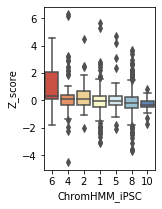

In [13]:
# iPSC
import seaborn as sns
import matplotlib.pyplot as plt
a4_dims = (2,3)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x="ChromHMM_iPSC",y="Z_score",data=Chip_in_TAD_clean_iPSC_1_nodup_with_CM, 
                  order = [6,4,2,1,5,8,10],palette="RdYlBu")

In [44]:
Chip_in_TAD_clean_iPSC_1_nodup_with_CM.head()

,index,LAD_chr,LAD_start,LAD_end,BC_chr,BC_start,BC_end,_barcode,cDNA_D0_1_diff,cDNA_D0_2_diff,...,log_activation3_2,log_activation3_3,activation_avg,log_iPSC_SCR_avg,CM_bins,rank,fitted_values,residuals,Z_score,ChromHMM_iPSC
1255,4115984,chr2,35800000,35880000,chr2,35819697,35819698,CTCAACAAGTTTCTGTA,6,3,...,1.311060,0.879103,1.326147,-2.138855,1,4.0,1.609371,-0.283224,-1.363700,1.0
503,1036857,chr8,38760000,39880000,chr8,39658465,39658466,TGTGTCTCATGCACGTT,4,0,...,NaN,0.642006,1.215022,-1.988870,1,2.0,1.364026,-0.149004,-0.697327,8.0
374,769007,chr7,113760000,116120000,chr7,115528410,115528411,AGGCGTGACGGGCATTC,1,1,...,0.957284,NaN,1.159630,-1.981682,1,1.0,1.353256,-0.193626,-0.918865,6.0
969,2072514,chr15,34960000,37920000,chr15,35809355,35809356,GGGGAAGCGGAGTATGG,1,1,...,1.447849,NaN,1.303452,-1.945773,1,3.0,1.300714,0.002737,0.056037,8.0
593,1206976,chr14,94000000,95440000,chr14,94256826,94256827,AAACGAGCATGTTTTAA,2,2,...,1.566531,1.565306,1.367184,-1.878652,1,5.0,1.207912,0.159272,0.833200,8.0


In [51]:
Chip_in_TAD_clean_iPSC_1_nodup_with_CM_zcore_only = pd.DataFrame()
Chip_in_TAD_clean_iPSC_1_nodup_with_CM_zcore_only["Z_score"] = Chip_in_TAD_clean_iPSC_1_nodup_with_CM["Z_score"].copy()
Chip_in_TAD_clean_iPSC_1_nodup_with_CM_zcore_only["ChromHMM_iPSC"] = Chip_in_TAD_clean_iPSC_1_nodup_with_CM["ChromHMM_iPSC"].copy()
a = Chip_in_TAD_clean_iPSC_1_nodup_with_CM_zcore_only.pivot(columns='ChromHMM_iPSC', values='Z_score')
a.to_csv(r'/Users/qw2/Desktop/Z_score_iPSC.csv', sep='\t')

In [50]:
a.head()

ChromHMM_iPSC,nan,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
0,NaN,NaN,NaN,NaN,NaN,NaN,3.383376,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.359337,NaN,NaN
2,NaN,-0.090351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,-0.212757,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.071793,NaN,NaN,NaN,NaN,NaN


point1
point2
('cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr', 'cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr')


/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:215: RuntimeWarning: divide by zero encountered in log10


('cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr', 'cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr')
('cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr', 'cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr')
('cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr', 'cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr')
('cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr', 'cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr')
('cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr', 'cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr')
('cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr', 'cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr')
('cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr', 'cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr')
('cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr', 'cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr')
('cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr', 'cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr')
('cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr', 'cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr')
('cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr', 'cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr')
('cDNA/gDNA ratio.23_VPRscp4_ineuron_vpr', 'cDNA/gDNA ratio.24_VP

/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


point3


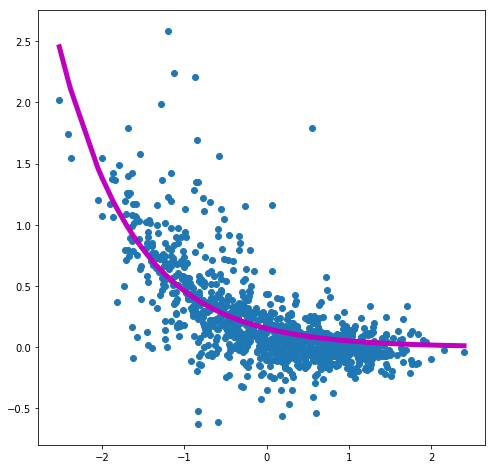

In [32]:
#  ALL IN ONE INEURON FOR PARAMETER SETTING# iNeuron Barcode activation feature analysis
#  Calculate the "outliers" based on model residuals
#  Analaysis the dataset with the inf activation vs non inf activation (basal SCP =0 and basal SCP >0)
#  iNeuron

from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

col_names = ["LAD_chr",
"LAD_start",
"LAD_end",
"BC_chr",
"BC_start",
"BC_end",
"_barcode",
"cDNA_D0_1_diff",
"cDNA_D0_2_diff",
"cDNA_D0_3_diff",
"cDNA_D0_4_diff",
"cDNA_D2_1_diff",
"cDNA_D2_2_diff",
"cDNA_D2_3_diff",
"cDNA_D2_4_diff",
"cDNA_D5_1_diff",
"cDNA_D5_2_diff",
"cDNA_D5_3_diff",
"cDNA_D5_4_diff",
"cDNA_SCP_A1_ips_vpr",
"cDNA_SCP_A2_ips_vpr",
"cDNA_SCP_B1_ips_vpr",
"cDNA_SCP_B2_ips_vpr",
"cDNA_SCR_A1_ips_vpr",
"cDNA_SCR_A2_ips_vpr",
"cDNA_SCR_B1_ips_vpr",
"cDNA_SCR_B2_ips_vpr",
"cDNA_VPRscp1_ineuron_vpr",
"cDNA_VPRscp2_ineuron_vpr",
"cDNA_VPRscp3_ineuron_vpr",
"cDNA_VPRscp4_ineuron_vpr",
"cDNA_VPRscr1_ineuron_vpr",
"cDNA_VPRscr2_ineuron_vpr",
"cDNA_VPRscr3_ineuron_vpr",
"cDNA_VPRscr4_ineuron_vpr",
"cDNA_WT1_ineuron_vpr",
"cDNA_WT2_ineuron_vpr",
"cDNA_WT3_ineuron_vpr",
"cDNA_WT4_ineuron_vpr",
"cDNA_WT_A_ips_vpr",
"cDNA_WT_B_ips_vpr",
"gDNA_D0_1_diff",
"gDNA_D0_2_diff",
"gDNA_D0_3_diff",
"gDNA_D0_4_diff",
"gDNA_D2_1_diff",
"gDNA_D2_2_diff",
"gDNA_D2_3_diff",
"gDNA_D2_4_diff",
"gDNA_D5_1_diff",
"gDNA_D5_2_diff",
"gDNA_D5_3_diff",
"gDNA_D5_4_diff",
"gDNA_SCP_A1_ips_vpr",
"gDNA_SCP_A2_ips_vpr",
"gDNA_SCP_B1_ips_vpr",
"gDNA_SCP_B2_ips_vpr",
"gDNA_SCR_A1_ips_vpr",
"gDNA_SCR_A2_ips_vpr",
"gDNA_SCR_B1_ips_vpr",
"gDNA_SCR_B2_ips_vpr",
"gDNA_VPRscp1_ineuron_vpr",
"gDNA_VPRscp2_ineuron_vpr",
"gDNA_VPRscp3_ineuron_vpr",
"gDNA_VPRscp4_ineuron_vpr",
"gDNA_VPRscr1_ineuron_vpr",
"gDNA_VPRscr2_ineuron_vpr",
"gDNA_VPRscr3_ineuron_vpr",
"gDNA_VPRscr4_ineuron_vpr",
"gDNA_WT1_ineuron_vpr",
"gDNA_WT2_ineuron_vpr",
"gDNA_WT3_ineuron_vpr",
"gDNA_WT4_ineuron_vpr",
"gDNA_WT_A_ips_vpr",
"gDNA_WT_B_ips_vpr",
"cDNA/gDNA ratio_D0_1_diff",
"cDNA/gDNA ratio.1_D0_2_diff",
"cDNA/gDNA ratio.2_D0_3_diff",
"cDNA/gDNA ratio.3_D0_4_diff",
"cDNA/gDNA ratio.4_D2_1_diff",
"cDNA/gDNA ratio.5_D2_2_diff",
"cDNA/gDNA ratio.6_D2_3_diff",
"cDNA/gDNA ratio.7_D2_4_diff",
"cDNA/gDNA ratio.8_D5_1_diff",
"cDNA/gDNA ratio.9_D5_2_diff",
"cDNA/gDNA ratio.10_D5_3_diff",
"cDNA/gDNA ratio.11_D5_4_diff",
"cDNA/gDNA ratio.12_SCP_A1_ips_vpr",
"cDNA/gDNA ratio.13_SCP_A2_ips_vpr",
"cDNA/gDNA ratio.14_SCP_B1_ips_vpr",
"cDNA/gDNA ratio.15_SCP_B2_ips_vpr",
"cDNA/gDNA ratio.16_SCR_A1_ips_vpr",
"cDNA/gDNA ratio.17_SCR_A2_ips_vpr",
"cDNA/gDNA ratio.18_SCR_B1_ips_vpr",
"cDNA/gDNA ratio.19_SCR_B2_ips_vpr",
"cDNA/gDNA ratio.32_WT_A_ips_vpr",
"cDNA/gDNA ratio.33_WT_B_ips_vpr",
"cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr",
"cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr",
"cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr",
"cDNA/gDNA ratio.23_VPRscp4_ineuron_vpr",
"cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr",
"cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr",
"cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr",
"cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr",
"cDNA/gDNA ratio.28_WT1_ineuron_vpr",
"cDNA/gDNA ratio.29_WT2_ineuron_vpr",
"cDNA/gDNA ratio.30_WT3_ineuron_vpr",
"cDNA/gDNA ratio.31_WT4_ineuron_vpr",
"cutting_MspI high",
"cutting_MspI low",
"cutting_MspI mid",
"cutting_Tat1 37 high",
"cutting_Tat1 37 low",
"cutting_Tat1 37 mid",
"cutting_Tat1 65 high",
"cutting_Tat1 65 low",
"cutting_Tat1 65 mid",
"cutting_ambiguity",
"loc_chr",
"loc_location",
"sum_sum",
"_t test iPSC VPR vs SCR WT",
"_t test iNeuron VPR vs SCR WT",
"_p sig in iPSC",
"_p sig in iNeuron",
"_D5/D0",
"_Segment number",
"_In group index",
"In_or_out",
"Chip_sample",
"Chip_chr",
"Chip_start",
"Chip_end",
"Chip_peak_name",
"Chip_peak_intensity",
"peak_bed",
"Chip_p",
"Chip_q",
"peak_bed",
"Chip_summit"]

Chip_in_TAD = pd.read_csv("/Users/qw2/Documents1/Sanger/GL_analysis/35_chip_with_TAD_boundary/03_bedtools_interesect/02_Chip_expand_LAD.bed",sep="\t", names=col_names, header=None)

import numpy as np
Chip_in_TAD['iPSC_SCP_avg'] = Chip_in_TAD[['cDNA/gDNA ratio.12_SCP_A1_ips_vpr',
                                        'cDNA/gDNA ratio.13_SCP_A2_ips_vpr',
                                        'cDNA/gDNA ratio.14_SCP_B1_ips_vpr',
                                        'cDNA/gDNA ratio.15_SCP_B2_ips_vpr']].median(axis=1)
Chip_in_TAD['iPSC_SCR_avg'] = Chip_in_TAD[['cDNA/gDNA ratio.16_SCR_A1_ips_vpr',
                                        'cDNA/gDNA ratio.17_SCR_A2_ips_vpr',
                                        'cDNA/gDNA ratio.18_SCR_B1_ips_vpr',
                                        'cDNA/gDNA ratio.19_SCR_B2_ips_vpr']].median(axis=1) 

Chip_in_TAD['iNeuron_SCP_avg'] = Chip_in_TAD[['cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr',
                                            'cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr',
                                            'cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr',
                                            'cDNA/gDNA ratio.23_VPRscp4_ineuron_vpr']].median(axis=1) 
Chip_in_TAD['iNeuron_SCR_avg'] = Chip_in_TAD[['cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr',
                                            'cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr',
                                            'cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr',
                                            'cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr']].median(axis=1) 

Chip_in_TAD['median_iPSC_control_gDNA_count'] = Chip_in_TAD[["gDNA_SCP_A1_ips_vpr",
                                                             "gDNA_SCP_A2_ips_vpr",
                                                             "gDNA_SCP_B1_ips_vpr",
                                                             "gDNA_SCP_B2_ips_vpr",
                                                             "gDNA_SCR_A1_ips_vpr",
                                                             "gDNA_SCR_A2_ips_vpr",
                                                             "gDNA_SCR_B1_ips_vpr",
                                                             "gDNA_SCR_B2_ips_vpr",
                                                             "gDNA_WT_A_ips_vpr",
                                                             "gDNA_WT_B_ips_vpr"]].median(axis=1)

Chip_in_TAD['median_iNeuron_control_gDNA_count'] = Chip_in_TAD[["gDNA_VPRscp1_ineuron_vpr",
                                                                "gDNA_VPRscp2_ineuron_vpr",
                                                                "gDNA_VPRscp3_ineuron_vpr",
                                                                "gDNA_VPRscp4_ineuron_vpr",
                                                                "gDNA_VPRscr1_ineuron_vpr",
                                                                "gDNA_VPRscr2_ineuron_vpr",
                                                                "gDNA_VPRscr3_ineuron_vpr",
                                                                "gDNA_VPRscr4_ineuron_vpr",
                                                                "gDNA_WT1_ineuron_vpr",
                                                                "gDNA_WT2_ineuron_vpr",
                                                                "gDNA_WT3_ineuron_vpr",
                                                                "gDNA_WT4_ineuron_vpr",]].median(axis=1)
print("point1")

# filter out the BCs where the median gDNA of dCas9_VPR activation experiment less than 10 read counts
Chip_in_TAD_clean = Chip_in_TAD.loc[Chip_in_TAD['median_iNeuron_control_gDNA_count'] > 5]

# Drop out iNeuron average is 0
Chip_in_TAD_clean_iNeuron_1 = Chip_in_TAD_clean.loc[(Chip_in_TAD_clean['iNeuron_SCR_avg'] > 0)]

# Calculate the FC permutations
SCP = ["cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr","cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr","cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr","cDNA/gDNA ratio.23_VPRscp4_ineuron_vpr"]
SCR = ["cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr","cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr","cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr","cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr"]

print("point2")

index_i = 0
while index_i < len(SCP):
    index_j = 0
    while index_j < len(SCR):
        print (SCP[index_i], SCR[index_j])
        Chip_in_TAD_clean_iNeuron_1['log_activation' + str(index_i) + "_" + str(index_j)] = np.log10(Chip_in_TAD_clean_iNeuron_1[SCP[index_i]] / Chip_in_TAD_clean_iNeuron_1[SCR[index_j]])
        index_j += 1
    index_i += 1


# Calculate the median of FC activation
Chip_in_TAD_clean_iNeuron_1['activation_avg'] = Chip_in_TAD_clean_iNeuron_1[['log_activation0_0',
                                                                       'log_activation0_1',
                                                                       'log_activation0_2',
                                                                       'log_activation0_3',
                                                                       'log_activation1_0',
                                                                       'log_activation1_1',
                                                                       'log_activation1_2',
                                                                       'log_activation1_3',
                                                                       'log_activation2_0',
                                                                       'log_activation2_1',
                                                                       'log_activation2_2',
                                                                       'log_activation2_3',
                                                                       'log_activation3_0',
                                                                       'log_activation3_1',
                                                                       'log_activation3_2',
                                                                       'log_activation3_3']].median(axis=1)

print("point3")

# Drop all the duplicate rows
Chip_in_TAD_clean_iNeuron_1_nodup = Chip_in_TAD_clean_iNeuron_1.drop_duplicates(subset=['_barcode', 'BC_start'],keep='first').reset_index()

# Drop all the inf and NA rows based on the activation_avg column
Chip_in_TAD_clean_iNeuron_1_nodup.replace([np.inf, -np.inf], np.nan, inplace=True)
Chip_in_TAD_clean_iNeuron_1_nodup = Chip_in_TAD_clean_iNeuron_1_nodup[pd.notnull(Chip_in_TAD_clean_iNeuron_1_nodup['activation_avg'])]

Chip_in_TAD_clean_iNeuron_1_nodup['log_iNeuron_SCR_avg'] = np.log10(Chip_in_TAD_clean_iNeuron_1_nodup["iNeuron_SCR_avg"])
Chip_in_TAD_clean_iNeuron_1_nodup.replace([np.inf, -np.inf], np.nan, inplace=True)
Chip_in_TAD_clean_iNeuron_1_nodup = Chip_in_TAD_clean_iNeuron_1_nodup[pd.notnull(Chip_in_TAD_clean_iNeuron_1_nodup['log_iNeuron_SCR_avg'])]

# first, define a exponential decay function,
def expd(x, a, b):
    return a * np.exp(b * x)
popt, pcov = curve_fit(expd, Chip_in_TAD_clean_iNeuron_1_nodup.log_iNeuron_SCR_avg.values,
                             Chip_in_TAD_clean_iNeuron_1_nodup.activation_avg.values)


# sort X values for easy plotting later
Chip_in_TAD_clean_iNeuron_1_nodup.sort_values(by='log_iNeuron_SCR_avg', inplace=True)

plt.subplots(figsize=(8,8))

# check the scatter
plt.scatter(Chip_in_TAD_clean_iNeuron_1_nodup.log_iNeuron_SCR_avg.values,
            Chip_in_TAD_clean_iNeuron_1_nodup.activation_avg.values)
expect = expd(Chip_in_TAD_clean_iNeuron_1_nodup.log_iNeuron_SCR_avg.values, popt[0], popt[1])

# plot the fitted line
plt.plot(Chip_in_TAD_clean_iNeuron_1_nodup.log_iNeuron_SCR_avg.values, expect, 'm-', lw=5)
plt.savefig('/Users/qw2/Desktop/iNeuron_expoential_decay.pdf')
plt.show()

# calculate the fitted values based on X:
Chip_in_TAD_clean_iNeuron_1_nodup['fitted_values'] = expd(Chip_in_TAD_clean_iNeuron_1_nodup.log_iNeuron_SCR_avg, *popt)

# calculate the residuals
Chip_in_TAD_clean_iNeuron_1_nodup['residuals'] = Chip_in_TAD_clean_iNeuron_1_nodup.activation_avg - Chip_in_TAD_clean_iNeuron_1_nodup.fitted_values


# calculate the mean and standard deviation of residuls
sd = Chip_in_TAD_clean_iNeuron_1_nodup.residuals.std()
mean = Chip_in_TAD_clean_iNeuron_1_nodup.residuals.mean()

# get Z scores
Chip_in_TAD_clean_iNeuron_1_nodup['Z_score'] = (Chip_in_TAD_clean_iNeuron_1_nodup.residuals - mean) / sd

In [23]:
print(popt)

[ 0.15215146 -1.10279679]


/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


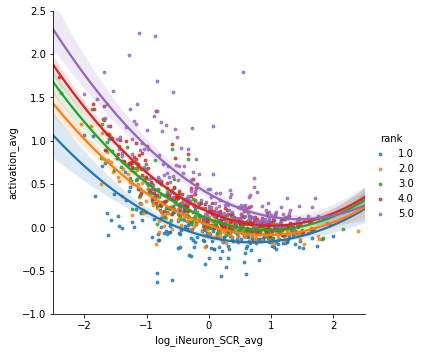

In [24]:
# from all the data, customize bin the data into 100 intervals by the x axis
# rank the y wihtin the bin
# extract the give the absolute rank to the each tem, give them label as 1 to len(tem)
# look for features
# iNeuron
import seaborn as sns

Chip_in_TAD_clean_iNeuron_1_nodup['CM_bins'] = pd.qcut(Chip_in_TAD_clean_iNeuron_1_nodup['log_iNeuron_SCR_avg'].rank(method='first'),210,labels=range(1, 211))
Chip_in_TAD_clean_iNeuron_1_nodup.sort_values(by='CM_bins', inplace=True)

Chip_in_TAD_clean_iNeuron_1_nodup_with_CM = pd.DataFrame()
for i in range(1, 211):
    tem = Chip_in_TAD_clean_iNeuron_1_nodup.loc[Chip_in_TAD_clean_iNeuron_1_nodup['CM_bins'] == i]
    tem['rank'] = tem['activation_avg'].rank(method='first')
    Chip_in_TAD_clean_iNeuron_1_nodup_with_CM = pd.concat([Chip_in_TAD_clean_iNeuron_1_nodup_with_CM,tem])

# plot the customized CM groups in the figure
# Note! the way for the outliers is independt of exponetial decay model. It's the up / low of binned ranking
a = sns.lmplot(x='log_iNeuron_SCR_avg',y='activation_avg',hue='rank',
            fit_reg=True, order=2,x_ci=None, scatter_kws={"s": 8},
           data=Chip_in_TAD_clean_iNeuron_1_nodup_with_CM)
a.set(xlim=(-2.5,2.5), ylim=(-1,2.5))
plt.show()

In [25]:
# Calculate R2 and plot the expontential decay model
ss_res = np.sum(Chip_in_TAD_clean_iNeuron_1_nodup_with_CM['residuals']**2)
ss_tot = np.sum((Chip_in_TAD_clean_iNeuron_1_nodup['activation_avg']-np.mean(Chip_in_TAD_clean_iNeuron_1_nodup['activation_avg']))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

0.523211441353699


In [26]:
# Map the ED group back to the orifinal Chip data
# Chip_in_TAD_clean_iNeuron_1["ED_group"] = Chip_in_TAD_clean_iNeuron_1['_barcode'].map(Chip_in_TAD_clean_iNeuron_1_nodup_with_CM.set_index('_barcode')['ED_group'])
Chip_in_TAD_clean_iNeuron_1["CM_groups"] = Chip_in_TAD_clean_iNeuron_1['_barcode'].map(Chip_in_TAD_clean_iNeuron_1_nodup_with_CM.set_index('_barcode')['rank'])
Chip_in_TAD_clean_iNeuron_1['iPSC_iNeuron'] = "NA"
Chip_in_TAD_clean_iNeuron_1['iPSC_iNeuron'] = np.where(Chip_in_TAD_clean_iNeuron_1[('Chip_sample')].str.contains("iPSC"),'iPSC', Chip_in_TAD_clean_iNeuron_1['iPSC_iNeuron'])
Chip_in_TAD_clean_iNeuron_1['iPSC_iNeuron'] = np.where(Chip_in_TAD_clean_iNeuron_1[('Chip_sample')].str.contains("iNeuron"),'iNeuron', Chip_in_TAD_clean_iNeuron_1['iPSC_iNeuron'])

Chip_in_10K = pd.read_csv("/Users/qw2/Documents1/Sanger/GL_analysis/29_endo_diff_chip_analysis/03_all_Chip_expand_corrected.csv",sep=",", header=[0,1])

import numpy as np
Chip_in_10K['peak_bed','peak_coverage'] = Chip_in_10K[('peak_bed', 'Chip_end')] - Chip_in_10K[('peak_bed', 'Chip_start')]
Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'] = "NA"
Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'] = np.where(Chip_in_10K[('Chip_sample', 'Chip_sample')].str.contains("iPSC"),'iPSC', Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'])
Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'] = np.where(Chip_in_10K[('Chip_sample', 'Chip_sample')].str.contains("iNeuron"),'iNeuron', Chip_in_10K['iPSC_iNeuron','iPSC_iNeuron'])

col_names_2 = [
"BC_chr",
"BC_start",
"BC_end",
"_barcode",
"cDNA_D0_1_diff",
"cDNA_D0_2_diff",
"cDNA_D0_3_diff",
"cDNA_D0_4_diff",
"cDNA_D2_1_diff",
"cDNA_D2_2_diff",
"cDNA_D2_3_diff",
"cDNA_D2_4_diff",
"cDNA_D5_1_diff",
"cDNA_D5_2_diff",
"cDNA_D5_3_diff",
"cDNA_D5_4_diff",
"cDNA_SCP_A1_ips_vpr",
"cDNA_SCP_A2_ips_vpr",
"cDNA_SCP_B1_ips_vpr",
"cDNA_SCP_B2_ips_vpr",
"cDNA_SCR_A1_ips_vpr",
"cDNA_SCR_A2_ips_vpr",
"cDNA_SCR_B1_ips_vpr",
"cDNA_SCR_B2_ips_vpr",
"cDNA_VPRscp1_ineuron_vpr",
"cDNA_VPRscp2_ineuron_vpr",
"cDNA_VPRscp3_ineuron_vpr",
"cDNA_VPRscp4_ineuron_vpr",
"cDNA_VPRscr1_ineuron_vpr",
"cDNA_VPRscr2_ineuron_vpr",
"cDNA_VPRscr3_ineuron_vpr",
"cDNA_VPRscr4_ineuron_vpr",
"cDNA_WT1_ineuron_vpr",
"cDNA_WT2_ineuron_vpr",
"cDNA_WT3_ineuron_vpr",
"cDNA_WT4_ineuron_vpr",
"cDNA_WT_A_ips_vpr",
"cDNA_WT_B_ips_vpr",
"gDNA_D0_1_diff",
"gDNA_D0_2_diff",
"gDNA_D0_3_diff",
"gDNA_D0_4_diff",
"gDNA_D2_1_diff",
"gDNA_D2_2_diff",
"gDNA_D2_3_diff",
"gDNA_D2_4_diff",
"gDNA_D5_1_diff",
"gDNA_D5_2_diff",
"gDNA_D5_3_diff",
"gDNA_D5_4_diff",
"gDNA_SCP_A1_ips_vpr",
"gDNA_SCP_A2_ips_vpr",
"gDNA_SCP_B1_ips_vpr",
"gDNA_SCP_B2_ips_vpr",
"gDNA_SCR_A1_ips_vpr",
"gDNA_SCR_A2_ips_vpr",
"gDNA_SCR_B1_ips_vpr",
"gDNA_SCR_B2_ips_vpr",
"gDNA_VPRscp1_ineuron_vpr",
"gDNA_VPRscp2_ineuron_vpr",
"gDNA_VPRscp3_ineuron_vpr",
"gDNA_VPRscp4_ineuron_vpr",
"gDNA_VPRscr1_ineuron_vpr",
"gDNA_VPRscr2_ineuron_vpr",
"gDNA_VPRscr3_ineuron_vpr",
"gDNA_VPRscr4_ineuron_vpr",
"gDNA_WT1_ineuron_vpr",
"gDNA_WT2_ineuron_vpr",
"gDNA_WT3_ineuron_vpr",
"gDNA_WT4_ineuron_vpr",
"gDNA_WT_A_ips_vpr",
"gDNA_WT_B_ips_vpr",
"cDNA/gDNA ratio_D0_1_diff",
"cDNA/gDNA ratio.1_D0_2_diff",
"cDNA/gDNA ratio.2_D0_3_diff",
"cDNA/gDNA ratio.3_D0_4_diff",
"cDNA/gDNA ratio.4_D2_1_diff",
"cDNA/gDNA ratio.5_D2_2_diff",
"cDNA/gDNA ratio.6_D2_3_diff",
"cDNA/gDNA ratio.7_D2_4_diff",
"cDNA/gDNA ratio.8_D5_1_diff",
"cDNA/gDNA ratio.9_D5_2_diff",
"cDNA/gDNA ratio.10_D5_3_diff",
"cDNA/gDNA ratio.11_D5_4_diff",
"cDNA/gDNA ratio.12_SCP_A1_ips_vpr",
"cDNA/gDNA ratio.13_SCP_A2_ips_vpr",
"cDNA/gDNA ratio.14_SCP_B1_ips_vpr",
"cDNA/gDNA ratio.15_SCP_B2_ips_vpr",
"cDNA/gDNA ratio.16_SCR_A1_ips_vpr",
"cDNA/gDNA ratio.17_SCR_A2_ips_vpr",
"cDNA/gDNA ratio.18_SCR_B1_ips_vpr",
"cDNA/gDNA ratio.19_SCR_B2_ips_vpr",
"cDNA/gDNA ratio.32_WT_A_ips_vpr",
"cDNA/gDNA ratio.33_WT_B_ips_vpr",
"cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr",
"cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr",
"cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr",
"cDNA/gDNA ratio.23_VPRscp4_ineuron_vpr",
"cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr",
"cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr",
"cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr",
"cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr",
"cDNA/gDNA ratio.28_WT1_ineuron_vpr",
"cDNA/gDNA ratio.29_WT2_ineuron_vpr",
"cDNA/gDNA ratio.30_WT3_ineuron_vpr",
"cDNA/gDNA ratio.31_WT4_ineuron_vpr",
"cutting_MspI high",
"cutting_MspI low",
"cutting_MspI mid",
"cutting_Tat1 37 high",
"cutting_Tat1 37 low",
"cutting_Tat1 37 mid",
"cutting_Tat1 65 high",
"cutting_Tat1 65 low",
"cutting_Tat1 65 mid",
"cutting_ambiguity",
"loc_chr",
"loc_location",
"sum_sum",
"_t test iPSC VPR vs SCR WT",
"_t test iNeuron VPR vs SCR WT",
"_p sig in iPSC",
"_p sig in iNeuron",
"_D5/D0",
"_Segment number",
"_In group index",
'chr',
'start',
'end.1',
'Chip_sample', 
'Chip_chr',
'Chip_start',
'Chip_end',
'Chip_peak_name',
'Chip_peak_intensity',
'peak_bed',
'Chip_p',
'Chip_q',
'peak_bed.1',
'Chip_summit',
'peak_coverage',
'iPSC_iNeuron']

Chip_in_10K.columns = col_names_2
Chip_in_10K["CM_groups"] = Chip_in_10K['_barcode'].map(Chip_in_TAD_clean_iNeuron_1_nodup_with_CM.set_index('_barcode')['rank'])

/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/qw2/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [27]:
#  Look for the Chip features with the three groups
import ptitprince as pt
def chip_merged_to_figure(chip_mark,sum_mean):
    chip1 = Chip_in_10K.loc[Chip_in_10K['Chip_sample'].str.contains(chip_mark)]
    chip_plot = chip1[['BC_chr', 'BC_start', 'BC_end', '_barcode','Chip_peak_name','Chip_peak_intensity','iPSC_iNeuron','CM_groups','Chip_start','Chip_end']].copy()
    chip_plot.columns = ['chr','start','end','BC','Chip_peak_name','Chip_peak_intensity','iPSC_iNeuron','CM_groups','Chip_start','Chip_end']
    chip_plot1 = chip_plot.loc[chip_plot['iPSC_iNeuron'] == 'iNeuron']
    chip_plot1['averaged_peak_intensity'] = chip_plot1.groupby(['chr','start','end','BC','iPSC_iNeuron'])['Chip_peak_intensity'].transform(sum_mean)    
    chip_plot1['peak_coverage'] = chip_plot1['Chip_end'] - chip_plot1['Chip_start']
    chip_plot1['averaged_peak_coverage'] = chip_plot1.groupby(['chr','start','end','BC','iPSC_iNeuron'])['peak_coverage'].transform(sum_mean)  
    chip_plot_intensity = chip_plot1.drop_duplicates(['chr', 'start', 'end', 'BC', 'iPSC_iNeuron', 'averaged_peak_intensity'], keep='last')
    chip_plot_coverage = chip_plot1.drop_duplicates(['chr', 'start', 'end', 'BC', 'iPSC_iNeuron', 'averaged_peak_coverage'], keep='last')

    sns.regplot(x='CM_groups', y=np.log(chip_plot_intensity['averaged_peak_intensity']), 
                     line_kws={"color":"r","alpha":0.5,"lw":3},
                     x_estimator=np.mean,
                     x_ci = "sd",
                     data=chip_plot_intensity)

fig, axs = plt.subplots(nrows = 1, ncols=6, figsize=(30, 4),sharex=False, sharey=False)
ax = fig.add_subplot(1, 6, 1)
a = chip_merged_to_figure("H3K4me3","sum")
ax = fig.add_subplot(1, 6, 2)
b = chip_merged_to_figure("H3K27ac","sum")
ax = fig.add_subplot(1, 6, 3)
c = chip_merged_to_figure("H3K4me1","sum")
ax = fig.add_subplot(1, 6, 4)
a = chip_merged_to_figure("H3K36me3","sum")
ax = fig.add_subplot(1, 6, 5)
a = chip_merged_to_figure("H3K27me3","sum")
ax = fig.add_subplot(1, 6, 6)
a = chip_merged_to_figure("H3K9me3","sum")

plt.savefig('/Users/qw2/Desktop/Chip_iNeurons_bins_data.pdf')

ImportError: No module named ptitprince

In [29]:
GL_BC_clean_iPSC_iNeuron_ChromHMM = pd.read_csv("/Users/qw2/Documents1/Sanger/GL_analysis/37_ChromHMM_analysis_2/GL_BC_clean_iPSC_iNeuron_ChromHMM.csv",sep = "\t")
Chip_in_TAD_clean_iNeuron_1_nodup_with_CM['ChromHMM_iNeuron'] = Chip_in_TAD_clean_iNeuron_1_nodup_with_CM['_barcode'].map(GL_BC_clean_iPSC_iNeuron_ChromHMM.set_index('_barcode')['iNeuron_ChromHMM'])
Chip_in_TAD_clean_iNeuron_1_nodup_with_CM.shape

Rank_df = pd.DataFrame(Chip_in_TAD_clean_iNeuron_1_nodup_with_CM.groupby(['rank','ChromHMM_iNeuron']).size())
Rank_df2 = Rank_df.unstack('ChromHMM_iNeuron')
Rank_df2 = Rank_df2.fillna(0)

In [39]:
GL_BC_clean_iPSC_iNeuron_ChromHMM.head()

,loc_chr,loc_location,loc_location_end,_barcode,cDNA_D0_1_diff,cDNA_D0_2_diff,cDNA_D0_3_diff,cDNA_D0_4_diff,cDNA_D2_1_diff,cDNA_D2_2_diff,...,strand_y,iNeuron_chromHMM_start,iNeuron_chromHMM_end,tracks_setting_y,iPSC_SCP_avg,iPSC_SCR_avg,iPSC_CRISPRa_FC,iNeuron_SCP_avg,iNeuron_SCR_avg,iNeuron_CRISPRa_FC
0,chr18,32472130,32472131,TAGAGCGGTTAATAGCC,7,3,6,4,2,8,...,.,32471200,32472400,"0,102,0",3.304507,0.467343,7.070834,3.456515,0.138666,24.926942
1,chr4,93395418,93395419,CAAATGCTCTTGGCCTA,2,2,1,4,0,3,...,.,93264000,93408000,"204,204,102",3.642659,4.682095,0.777998,0.319748,0.000010,31974.807050
2,chr15,26271496,26271497,GTTTGAGGAACTTGTGT,120,68,73,161,5,13,...,.,26250000,26288400,"204,204,102",9.551884,7.195593,1.327463,0.131455,0.000010,13145.469150
3,chr13,55586856,55586857,TAGTATTTGTAGTATAA,247,142,158,187,19,30,...,.,55585000,55648600,"204,204,102",11.978183,11.178392,1.071548,0.232009,0.000010,23200.935850
4,chr6,121436626,121436627,TCGATTTGCACACCGTC,613,338,459,522,66,158,...,.,121436200,121438600,"102,51,153",45.351009,52.180222,0.869123,2.144193,0.173948,12.326662


In [32]:
print(Rank_df2)

                     0                                                   
ChromHMM_iNeuron  1.0   2.0  3.0   4.0   5.0  6.0  7.0    8.0  9.0   10.0
rank                                                                     
1.0               10.0   6.0  3.0  12.0   8.0  3.0  3.0  156.0  0.0   9.0
2.0               13.0   5.0  0.0  12.0   6.0  1.0  2.0  159.0  3.0   6.0
3.0                5.0  11.0  1.0  14.0   2.0  4.0  1.0  156.0  1.0  13.0
4.0               12.0   8.0  1.0  15.0   7.0  4.0  1.0  144.0  1.0  10.0
5.0               10.0   5.0  3.0  34.0  10.0  9.0  4.0  128.0  1.0   5.0


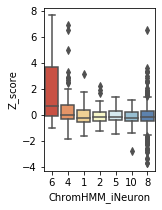

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
a4_dims = (2,3)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x="ChromHMM_iNeuron",y="Z_score",data=Chip_in_TAD_clean_iNeuron_1_nodup_with_CM, 
                  order = [6,4,1,2,5,10,8],palette="RdYlBu")


In [58]:
Chip_in_TAD_clean_iNeuron_1_nodup_with_CM_zcore_only = pd.DataFrame()
Chip_in_TAD_clean_iNeuron_1_nodup_with_CM_zcore_only["Z_score"] = Chip_in_TAD_clean_iNeuron_1_nodup_with_CM["Z_score"].copy()
Chip_in_TAD_clean_iNeuron_1_nodup_with_CM_zcore_only["ChromHMM_iNeuron"] = Chip_in_TAD_clean_iNeuron_1_nodup_with_CM["ChromHMM_iNeuron"].copy()
b = Chip_in_TAD_clean_iNeuron_1_nodup_with_CM_zcore_only.pivot(columns='ChromHMM_iNeuron', values='Z_score')
b.to_csv(r'/Users/qw2/Desktop/Z_score_iNeuron.csv', sep='\t')